<a href="https://colab.research.google.com/github/luimui/DataScience/blob/main/exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

## Evaluation

### Classification

#### Prediction possibilities

For a binary classification problem, what are the four prediction possibilities? List their names and briefly explain what they represent.

In [174]:
#TP, FP, TN, FN

#### Define the accuracy measure

In [175]:
#(TP+TN)/All Calssifictions(TP,TN,FP,FN)

#### Define precision and recall

In [176]:
#Precision: Anteil der TP von allen Positive classified PPR=TP/(TP+FP) wie richtig liegen meine positives    /    Recall oder Sensitivity:Anteil der TP an allen tatsächlich positiven = TP/(TP + FN) wieviele erwische ich

#### Properties of precision and recall
What can a classifier predicting the class `0` or `1` do to

1) always get a *precision* of `1`
1) always get a *recall* of `1`

precision: classify everythong as 0
recall: classify everything as 1

#### Application of precision and recall
In what applications is precision more important than recall, and in which applications is recall more important than precision?

In [177]:
#screen for deadly but curable disease: recall/sensitivity     #Precision: Blitzer soll nur wirklich zu schnelle klassifizieren

#### Combine precision and recall
* What is a measure that combines precision and recall?
* Define it.
* Why do we use the harmonic rather than the arithmetic mean?

In [178]:
#threat score: TP/(TP + FP + FN)
#harmonic mean is less sensitive against outliers(meaning number far away from 0)

#### Default values

Consider the following, label set:

* `y`: roughly the same amount of cases (`1`) and controls (`0`)

Now, calculate the *accuracy*, *precision*, *recall*, and *ROC AUC*.

1) For a classifier that returns random labels. What do you observe?
2) For a classifier that always returns `1`. What do you observe?

**Hints:**
* You can simulate these classifiers without input data, i.e., by generating their predictions manually.
* You can use `numpy` and `scikit-learn` to show these cases instead of answering theoretically.

In [179]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import statistics

np.random.seed(42)
n = 1000

# labels 1 (random)
y = np.random.choice([0,1], p=(0.5, 0.5), size=n)


# classification labels 1 (random)
np.random.seed(1337)
n = 1000
y_pred_rand = np.random.choice([0,1], p=(0.5, 0.5), size=n)

#classification labels always 1
y_pred_ones = np.ones(n)

#classification labels always
y_pred_zeros = np.zeros(n)


In [180]:
print("randoms: acc: {}  precision: {} recall: {}   roc_auc: {}   ".format(accuracy_score(y, y_pred_rand),precision_score(y,y_pred_rand),recall_score(y,y_pred_rand),roc_auc_score(y,y_pred_rand)))
print("{}".format(classification_report(y,y_pred_rand)))
print("harmonic mean prec and recall: {} ".format(statistics.harmonic_mean([precision_score(y,y_pred_rand),recall_score(y,y_pred_rand)])))


print("ones: acc: {}  precision: {} recall: {}   roc_auc: {}  ".format(accuracy_score(y, y_pred_ones),precision_score(y,y_pred_ones),recall_score(y,y_pred_ones),roc_auc_score(y,y_pred_ones)))
print("{}".format(classification_report(y,y_pred_ones)))
print("harmonic mean prec and recall: {} ".format(statistics.harmonic_mean([precision_score(y,y_pred_ones),recall_score(y,y_pred_ones)])))

print("zeros: acc: {}  precision: {} recall: {}   roc_auc: {}  ".format(accuracy_score(y, y_pred_zeros),precision_score(y,y_pred_zeros),recall_score(y,y_pred_zeros),roc_auc_score(y,y_pred_zeros)))
print("{}".format(classification_report(y,y_pred_zeros)))
print("harmonic mean prec and recall: {}".format(statistics.harmonic_mean([precision_score(y,y_pred_zeros),recall_score(y,y_pred_zeros)])))

randoms: acc: 0.518  precision: 0.5150300601202404 recall: 0.5171026156941649   roc_auc: 0.5179946478073211   
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       503
           1       0.52      0.52      0.52       497

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000

harmonic mean prec and recall: 0.5160642570281124 
ones: acc: 0.497  precision: 0.497 recall: 1.0   roc_auc: 0.5  
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       503
           1       0.50      1.00      0.66       497

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000

harmonic mean prec and recall: 0.663994655978624 
zeros: acc: 0.503  precision: 0.0 recall: 0.0   roc_auc: 0.5  
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

#### Imbalanced data

Consider the following, label set:

* `y_imbalanced`:  only a small set of cases (`1`) compated to controls (`0`)

Now, calculate the *accuracy*, *precision*, *recall*, and *ROC AUC*.

1) For a classifier that returns random labels. What do you observe?
2) For a classifier that always predicts the majority class (`0`). What do you observe and why could this be an issue in practice (particularly if we only consider `accuracy`)?
5) Which class label does `scikit-learn` consider to be a "case", i.e., the class of interest?

**Hints:**
* You can simulate these classifiers without input data, i.e., by generating their predictions manually.
* You can use `numpy` and `scikit-learn` to show these cases instead of answering theoretically.

In [181]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

np.random.seed(42)
n = 1000

# labels 2 (imbalanced, i.e., small sets of `cases` (label=1))
y_imbalance = np.random.choice([0,1], p=(0.9, 0.1), size=n)


# classification labels 1 (random)
np.random.seed(1337)
n = 1000
y_pred_rand = np.random.choice([0,1], p=(0.5, 0.5), size=n)

In [182]:
print("randoms: acc: {}  precision: {} recall: {}   roc_auc: {}   ".format(accuracy_score(y_imbalance, y_pred_rand),precision_score(y_imbalance,y_pred_rand),recall_score(y_imbalance,y_pred_rand),roc_auc_score(y_imbalance,y_pred_rand)))
print("{}".format(classification_report(y_imbalance,y_pred_rand)))
#acc: bleibt gleich, zwar ca 90 /100 psotives erkannt, aber auch 450/900 negatives richtig erkannt
#prec: geht stark runter: 90TP/90TP + ca450FP
#recall: bleibt gleich : 90TP/90TP + 50FN

randoms: acc: 0.515  precision: 0.11422845691382766 recall: 0.57   roc_auc: 0.5394444444444444   
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       900
           1       0.11      0.57      0.19       100

    accuracy                           0.52      1000
   macro avg       0.51      0.54      0.42      1000
weighted avg       0.83      0.51      0.61      1000



### Regression

#### MAE vs MSE

1. Write down the formulas for MAE and MSE.
2. When would you use MAE and when would you use MSE?
3. Which functions correspond to these measures in `scikit-learn`?


Mean absolute Error: $\frac{1}{n} \sum(|y-y_{pred}|)$  used without outliers
<br>
mean squared Error: $\frac{1}{n} \sum((y-y_{pred})^2)$ better against outliers or for strong penalty applications

#### $R^2$

1. Write down the formula for the $R^2$ measure.
2. Look at the formula and try to understand what the $R^2$ measure intuitively measures. **Hint:** Consider the case were we only predict the mean $\bar{y}$.
3. Which functions corresponds to $R^2$ in `scikit-learn`?

In [183]:
1-(Varianz in )

SyntaxError: ignored

In [184]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
#(pearsonr(y, y_pred)[0])**2, r2_score(y, y_pred))

ValueError: ignored

$RSS = \sum(y_{true}-y_{pred})^2)$
<br>
$TSS = \sum(y_{true}-y_{meanOfTrue})^2$
<br>
$R^2 = 1- RSS/TSS$
<br>
1 -  Anteil der Varianz in den Predictions weg vom True Value / Varianz innerhalb der true values
je dichter an 1 desto mehr Anteil der Varianz steckt in der Prediciton von der in den tatsächlichen Daten, desto besser erklärt die prediction die var der adtane

## Train / Test

1. Use `train_test_split` to shuffle and split the given data `(X, y)` into a train and a test dataset with a 80:20 ratio. (**Hint:** you can use the parameters `shuffle` and `test_size`)
2. Train the `DecisionTreeClassifier` on the training dataset.
3. Calculate the ROC AUC score for the training and the test dataset.
4. What do you observe?
5. Why should we always have a test set?
5. Why should we NEVER fit a model before we define a test set?

In [ ]:
np.random.seed(42)

n_samples = 1000
n_features = 100
X = np.random.random((n_samples, n_features))
y = np.random.choice([0, 1], p=(0.5, 0.5), size=n_samples)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46        96
           1       0.50      0.48      0.49       104

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200

0.4747596153846154


## Cross Validation

Consider the following dataset `(X, y)`. We already split it into a train `(X_train, y_train)`, `(X_val, y_val)`, and a test set `(X_test, y_test)`.

1. Fit a `DecisionTreeClassifier` on the train dataset.
2. Calculate the ROC AUC score on the train, validation, and test dataset. What do you observe?
*train score is 1, other very high*
3. How would you apply cross validation and how would it help you?
**
4. Apply cross validation appropriately and report the mean and standard deviation of the ROC AUC scores.
5. In addition to the ROC AUC score on the test set, why would you also always report the mean and standard deviation of the cross validations scores?
6. Why would you be a bit suspicious of the current AUC SCORE on the test set?
*low val roc auc*
7. BONUS: Why are we observing these results based on the data we use?
*becaus of the different batch in X*

In [223]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [224]:
np.random.seed(42)

n_samples = 200 * 6
X, y = make_classification(n_samples=n_samples, flip_y=0.01, n_redundant=2, n_informative=2)
X[-2*int(n_samples / 6):-int(n_samples / 6),:] = np.random.random((int(n_samples / 6), X.shape[1]))




In [225]:
# define the test set
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, y, test_size=1/6, shuffle=False)

In [226]:
# use the remaining data to define the train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_intermediate, y_intermediate, test_size=0.2, shuffle=False)

print(X.shape)
print(X.shape[0]-2*int(n_samples / 6),X.shape[0]-int(n_samples / 6),(int(n_samples / 6)))

(1200, 20)
800 1000 200


In [227]:
X_train, y_train
X_val, y_val
X_test, y_test;

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print("ROC AUC train: {}".format(roc_auc_score(y_train,y_pred)))

y_pred = clf.predict(X_val)
print("ROC AUC val: {}".format(roc_auc_score(y_val,y_pred)))

y_pred = clf.predict(X_test)
print("ROC AUC test: {}".format(roc_auc_score(y_test,y_pred)))



ROC AUC train: 1.0
ROC AUC val: 0.48036858974358976
ROC AUC test: 0.9349999999999999


In [229]:
from sklearn.model_selection import cross_val_score
for i in range(2,21):
  clf = DecisionTreeClassifier(max_depth=i)
  clf = clf.fit(X_train, y_train)
  scores = cross_val_score(clf, X_train, y_train, cv=i, scoring="roc_auc")
  print("ROC AUC cross val {}: {}".format(i, np.mean(scores)))

  y_pred = clf.predict(X_train)
  print("ROC AUC train: {}".format(roc_auc_score(y_train,y_pred)))

  y_pred = clf.predict(X_val)
  print("ROC AUC val: {}".format(roc_auc_score(y_val,y_pred)))

  y_pred = clf.predict(X_test)
  print("ROC AUC test: {} \n".format(roc_auc_score(y_test,y_pred)))


ROC AUC cross val 2: 0.9370499549954996
ROC AUC train: 0.9305805580558055
ROC AUC val: 0.5232371794871794
ROC AUC test: 0.905 

ROC AUC cross val 3: 0.953558665706261
ROC AUC train: 0.9406565656565656
ROC AUC val: 0.5232371794871794
ROC AUC test: 0.9199999999999999 

ROC AUC cross val 4: 0.9567456745674566
ROC AUC train: 0.9445194519451944
ROC AUC val: 0.5232371794871794
ROC AUC test: 0.92 

ROC AUC cross val 5: 0.9424466835638381
ROC AUC train: 0.9785853585358536
ROC AUC val: 0.4987980769230769
ROC AUC test: 0.965 

ROC AUC cross val 6: 0.9359419480139411
ROC AUC train: 0.9836358635863586
ROC AUC val: 0.4987980769230769
ROC AUC test: 0.955 

ROC AUC cross val 7: 0.9403088475336644
ROC AUC train: 0.9873737373737373
ROC AUC val: 0.48036858974358976
ROC AUC test: 0.96 

ROC AUC cross val 8: 0.9336087935174069
ROC AUC train: 0.98994899489949
ROC AUC val: 0.48036858974358976
ROC AUC test: 0.955 

ROC AUC cross val 9: 0.9375446383022141
ROC AUC train: 0.994949494949495
ROC AUC val: 0.498798

In [230]:
for c in {'gini', 'entropy', 'log_loss'}:
  clf = DecisionTreeClassifier(criterion=c)
  clf = clf.fit(X_train, y_train)
  scores = cross_val_score(clf, X_train, y_train, cv=i, scoring="roc_auc")
  print("ROC AUC cross val {}: {}".format(i, np.mean(scores)))

  y_pred = clf.predict(X_train)
  print("ROC AUC train: {}".format(roc_auc_score(y_train,y_pred)))

  y_pred = clf.predict(X_val)
  print("ROC AUC val: {}".format(roc_auc_score(y_val,y_pred)))

  y_pred = clf.predict(X_test)
  print("ROC AUC test: {} \n".format(roc_auc_score(y_test,y_pred)))



ROC AUC cross val 20: 0.9324561403508772
ROC AUC train: 1.0
ROC AUC val: 0.48036858974358976
ROC AUC test: 0.95 

ROC AUC cross val 20: 0.9447775689223057
ROC AUC train: 1.0
ROC AUC val: 0.5232371794871794
ROC AUC test: 0.965 

ROC AUC cross val 20: 0.9524028822055136
ROC AUC train: 1.0
ROC AUC val: 0.5376602564102564
ROC AUC test: 0.9649999999999999 



## Overfitting / Underfitting

1. Explain the bias / variance trade-off in your own words.
*raising the number of parameters usually leads to lower bias (distance from mean of real values) but higher variance(wider spread around that mean of real values - due to more flexible model swith more paraemters, that can overfit)*
2. For the data below, plot `X` against `y_orig` and `X` against `y` (**hint**: `y` is a noisy variant of `y_orig`).
**
3. Split the data into train (80%) and test (20%) sets.
4. Fit a `DecisionTreeRegressor` and calculate the mean absolute error for train and test set
5. Visualize the predictions for train and test.
6. Try different `max_depth`. Can you underfit, fit well, and overfit?
7. How does this connect to the bias / variance trade-off?

In [256]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [257]:
n_steps = 4
X = np.arange(50 * n_steps).reshape((-1,1))
y_orig = np.repeat(np.arange(4), int(X.shape[0] / n_steps))
y = y_orig + (np.random.random(y_orig.size) - 0.5) * 2

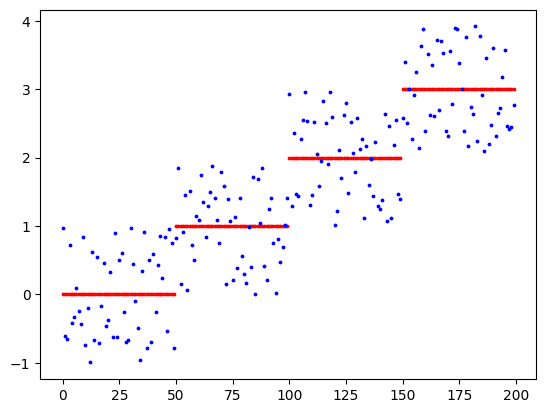

In [258]:
plt.scatter(X,y_orig,c="red",s=3)
plt.scatter(X,y,c="blue",s=3)

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [260]:
clf = DecisionTreeRegressor().fit(X_train,y_train)

In [261]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("mse train: {},  mse test: {}".format(mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_test, y_test_pred)))

mse train: 0.0,  mse test: 0.922218454241784


In [262]:
X_train.shape, y_train_pred.shape

((160, 1), (160,))

max_depth: 1 
 mse train: 0.6097919736220796,  mse test: 0.8258970054215478 



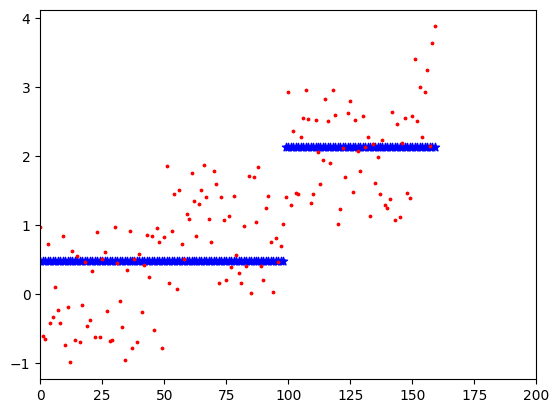

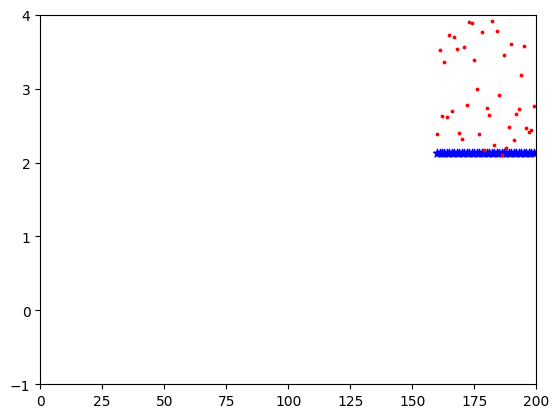

max_depth: 2 
 mse train: 0.5211053644456175,  mse test: 0.5289975223496013 



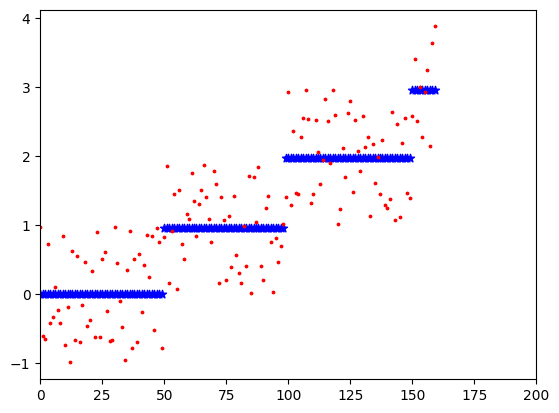

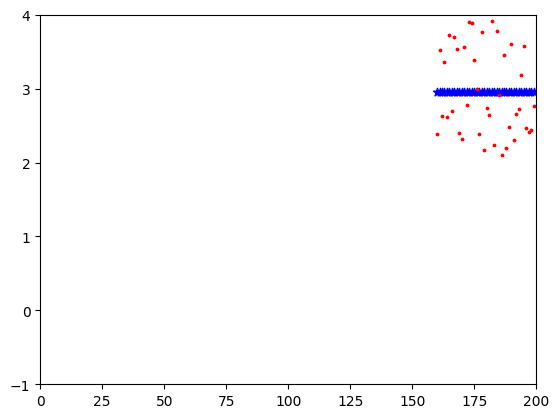

max_depth: 3 
 mse train: 0.4846584146816856,  mse test: 0.8204760744709247 



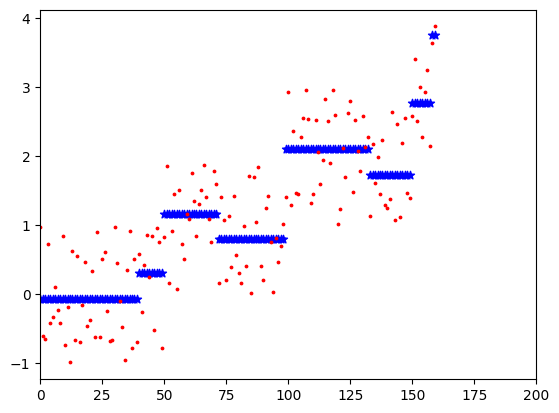

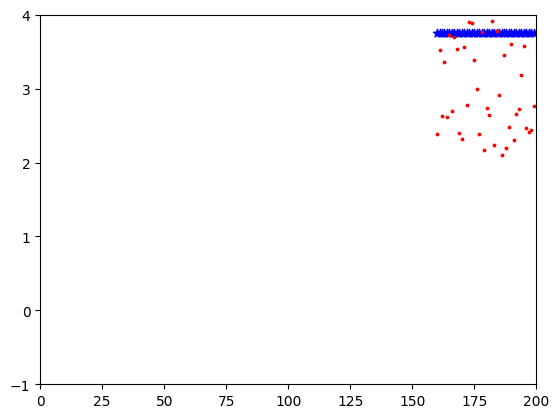

max_depth: 4 
 mse train: 0.44233922983169693,  mse test: 0.922218454241784 



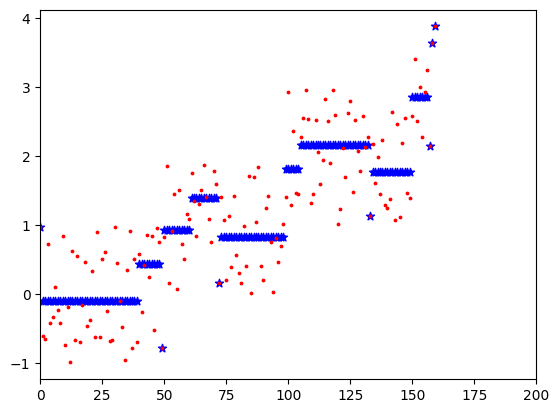

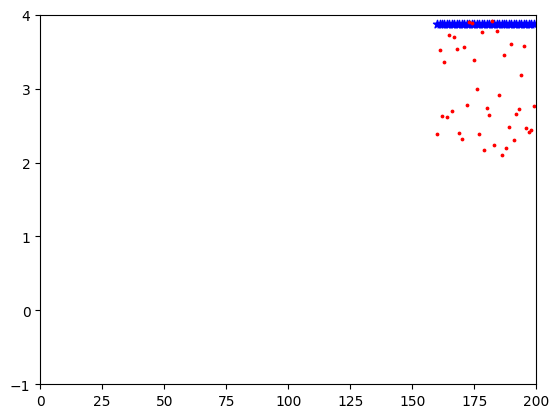

max_depth: 5 
 mse train: 0.4106971045196547,  mse test: 0.922218454241784 



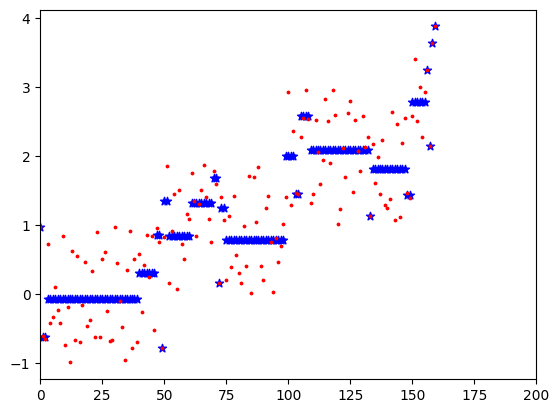

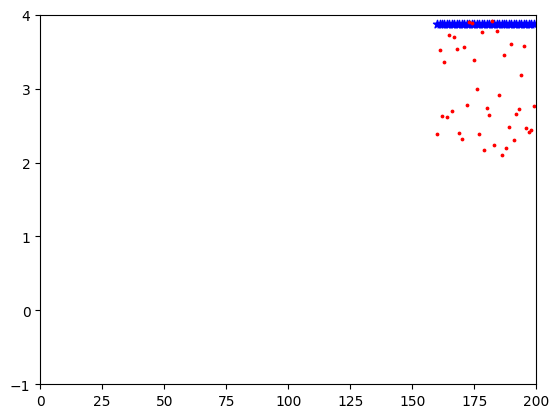

max_depth: 6 
 mse train: 0.3542572363093499,  mse test: 0.922218454241784 



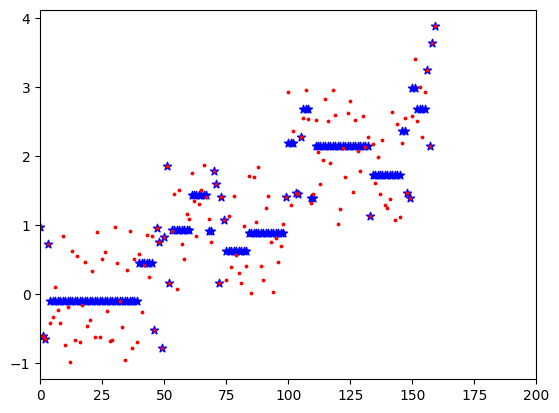

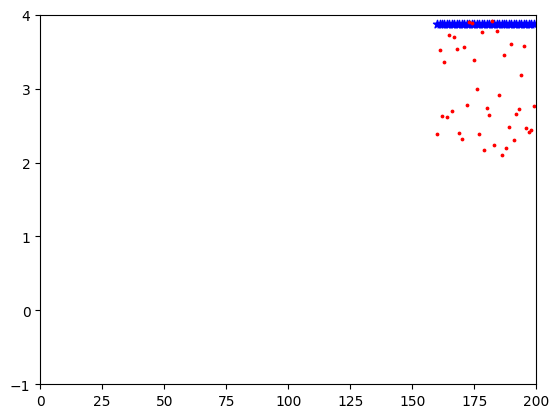

max_depth: 7 
 mse train: 0.32011685297043363,  mse test: 0.922218454241784 



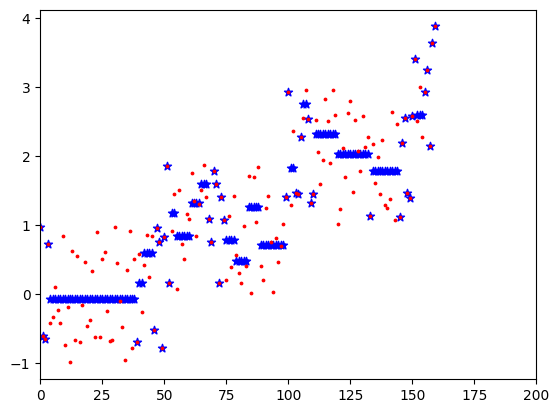

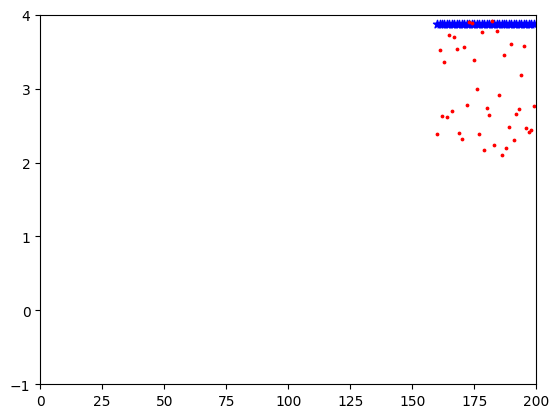

max_depth: 8 
 mse train: 0.2467963975999266,  mse test: 0.922218454241784 



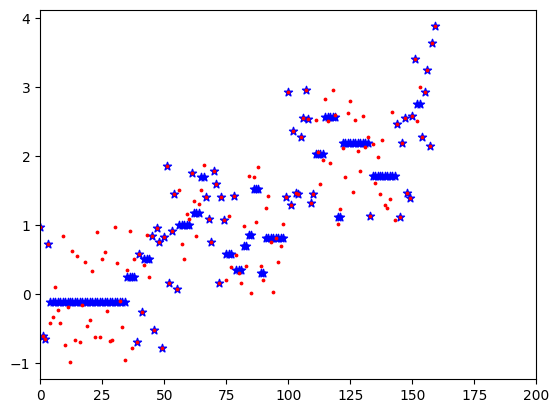

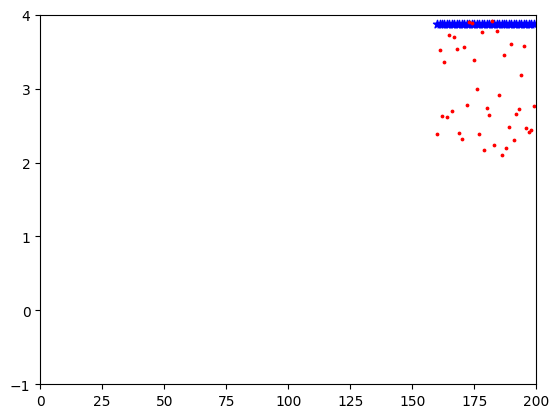

max_depth: 9 
 mse train: 0.19450423013609366,  mse test: 0.922218454241784 



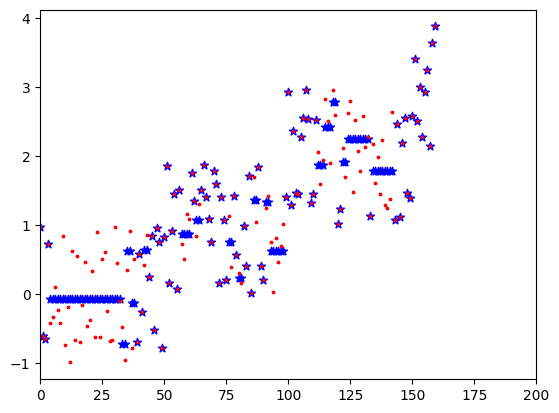

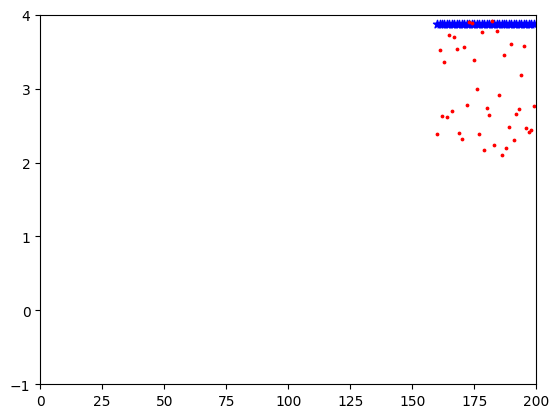

max_depth: 10 
 mse train: 0.12840731738076858,  mse test: 0.922218454241784 



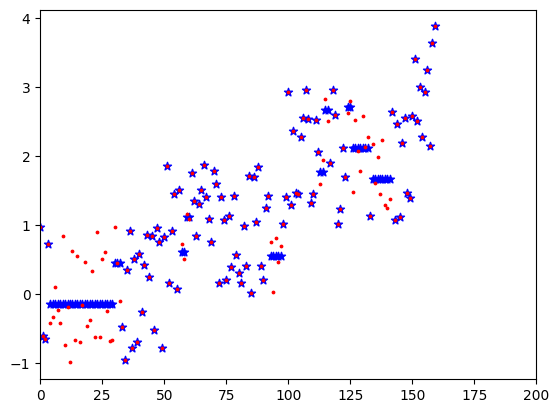

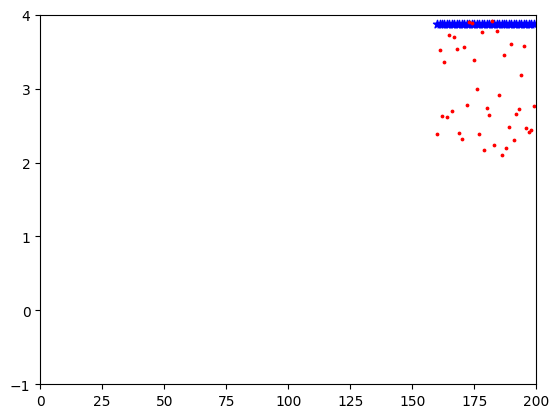

max_depth: 11 
 mse train: 0.10088301426685357,  mse test: 0.922218454241784 



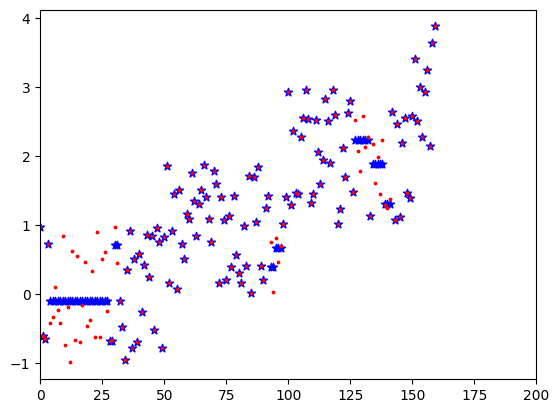

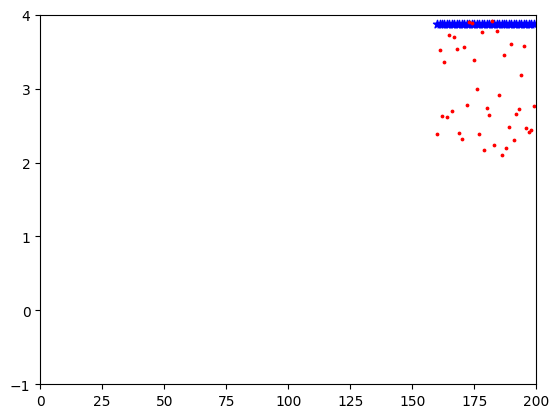

max_depth: 12 
 mse train: 0.08152336312960051,  mse test: 0.922218454241784 



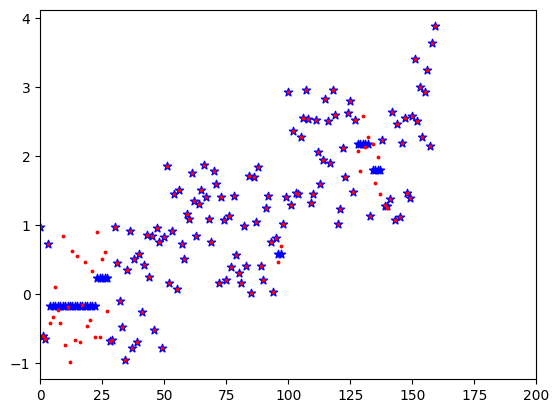

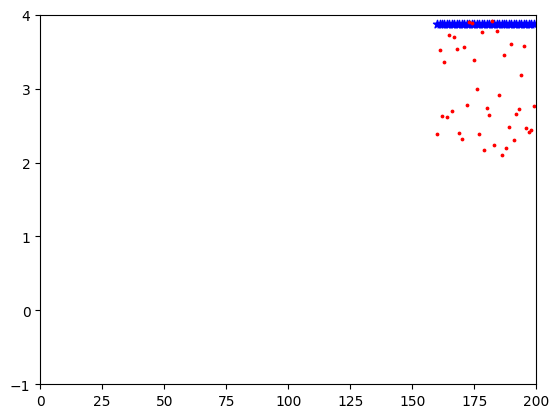

max_depth: 13 
 mse train: 0.06894021692798345,  mse test: 0.922218454241784 



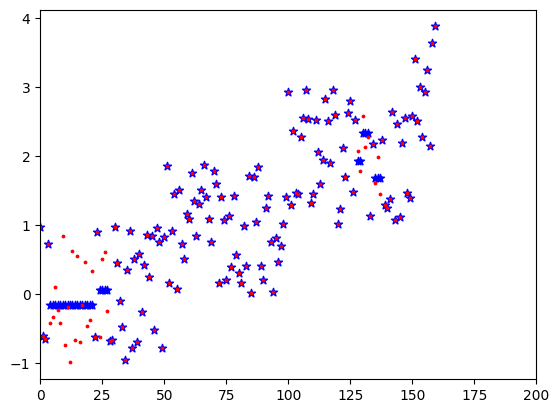

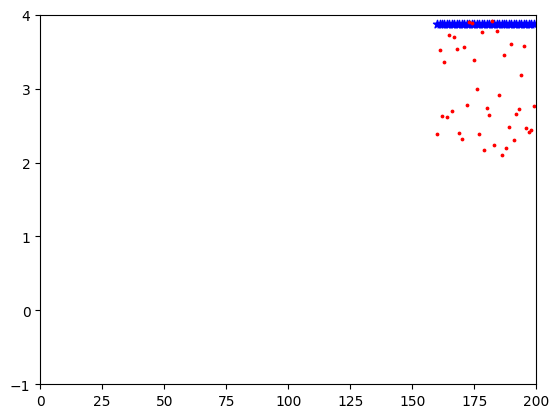

max_depth: 14 
 mse train: 0.05369154779891255,  mse test: 0.922218454241784 



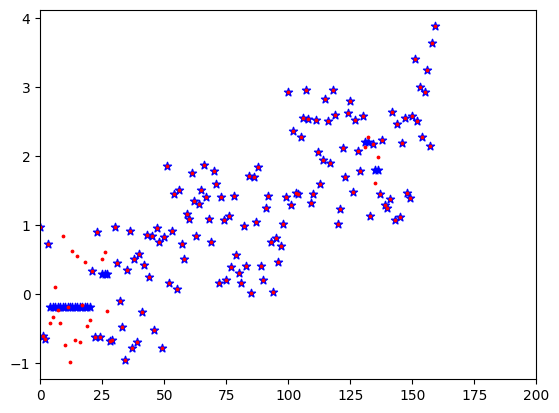

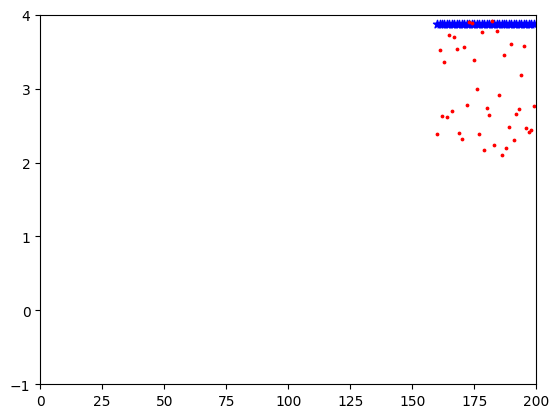

max_depth: 15 
 mse train: 0.04404716425264135,  mse test: 0.922218454241784 



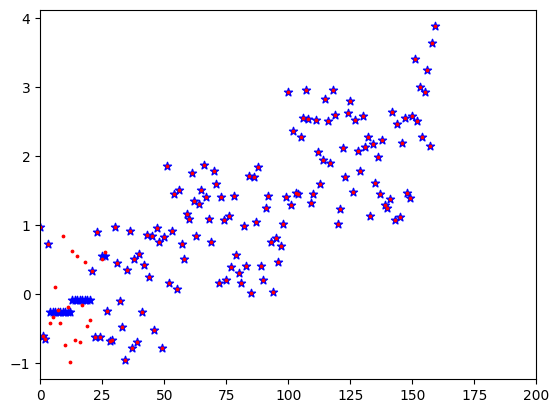

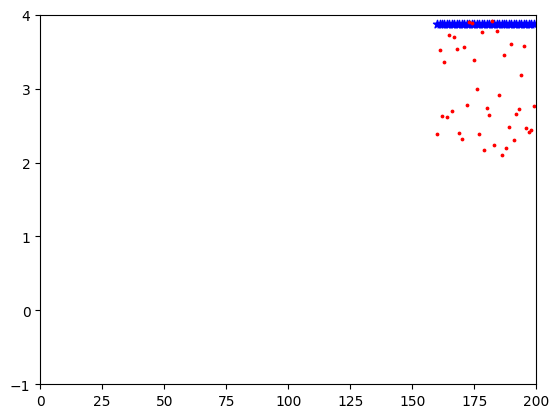

max_depth: 16 
 mse train: 0.037035198463693755,  mse test: 0.922218454241784 



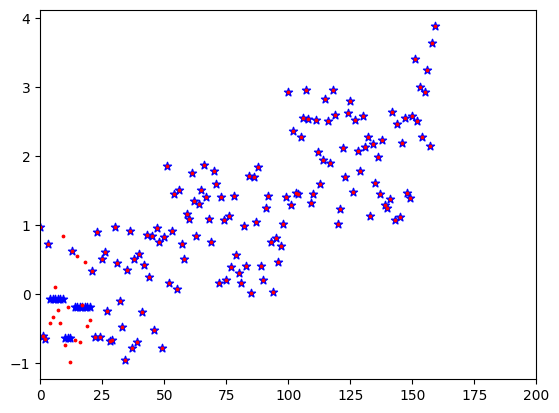

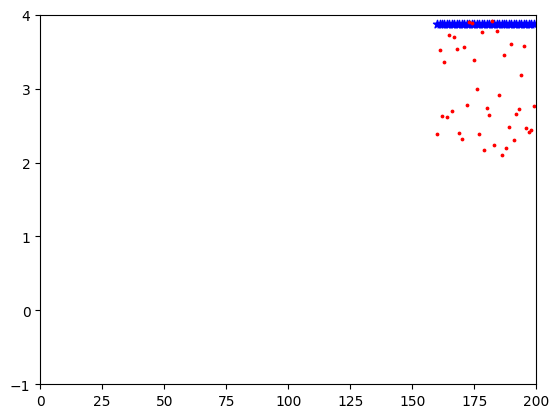

max_depth: 17 
 mse train: 0.023712636501420907,  mse test: 0.922218454241784 



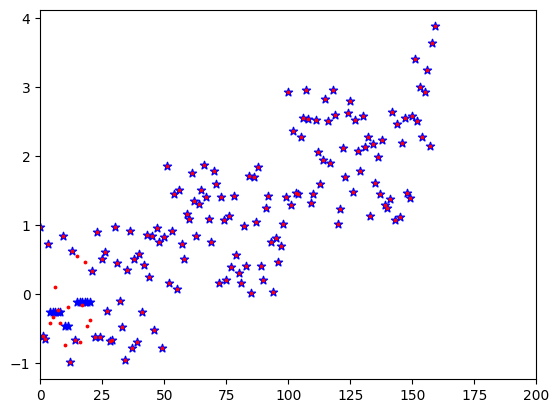

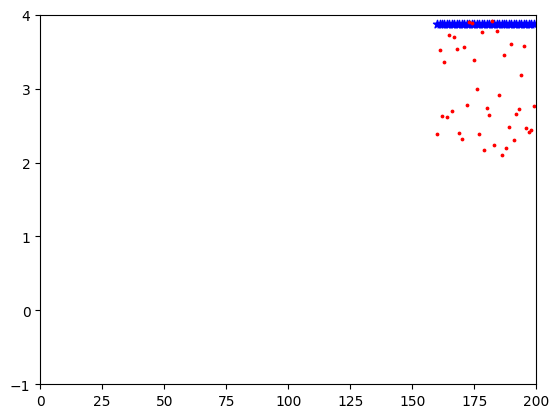

max_depth: 18 
 mse train: 0.01393204986231295,  mse test: 0.922218454241784 



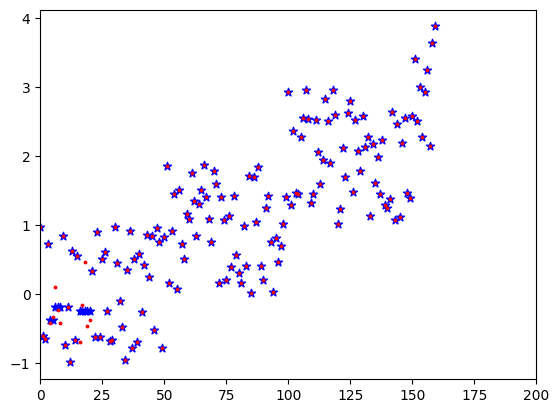

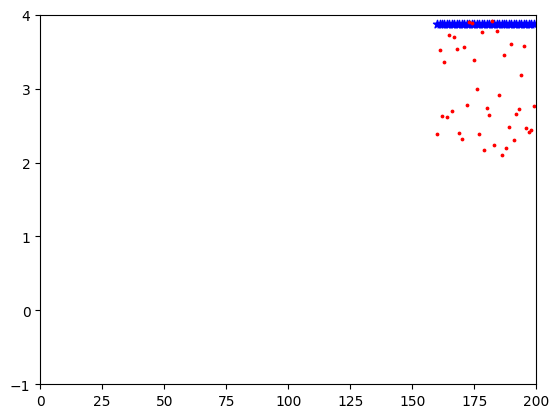

max_depth: 19 
 mse train: 0.008564742338122792,  mse test: 0.922218454241784 



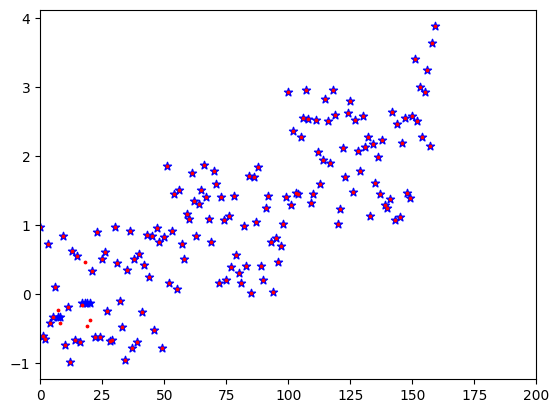

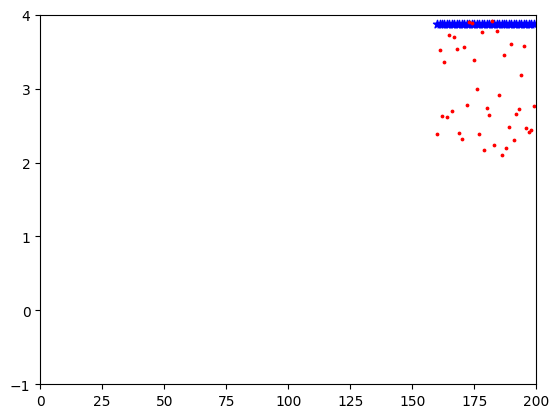

In [276]:
for i in range(1,20):
  clf = DecisionTreeRegressor(max_depth=i).fit(X_train,y_train)

  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  print("max_depth: {} \n mse train: {},  mse test: {} \n".format(i,mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_test, y_test_pred)))

  plt.scatter(X_train,y_train_pred,c="blue",marker="*")
  plt.scatter(X_train,y_train,c="red",s=3)
  plt.xlim(0,200)
  plt.show()

  plt.scatter(X_test,y_test_pred,c="blue",marker="*")
  plt.scatter(X_test,y_test,c="red",s=3)
  plt.ylim(-1, 4)
  plt.xlim(0,200)
  plt.show()

(0.0, 200.0)

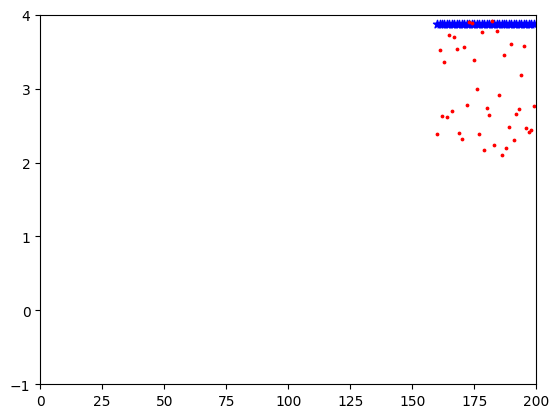

In [272]:
plt.scatter(X_test,y_test_pred,c="blue",marker="*")
plt.scatter(X_test,y_test,c="red",s=3)
plt.ylim(-1, 4)
plt.xlim(0,200)